In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

In [50]:
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

In [51]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

print("Signal Matrix : ", S.shape)
print("Mix Matrix : ", A.shape)
print("Transform Matrix: ", X.shape)

Signal Matrix :  (2000, 3)
Mix Matrix :  (3, 3)
Transform Matrix:  (2000, 3)


In [52]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [53]:
# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

In [177]:
from numpy import dot
X_mean = X.mean()
X_shift_mean = X-X_mean

w_grad = np.eye(3)
N = 2000
for current_iter in range(10000):
    u = dot(X_shift_mean,w_grad)
    U = np.tanh(u)
    g = np.linalg.inv(w_grad.T) - (2/len(X)) * dot(X_shift_mean.T,U)
    w_grad = w_grad + 0.04 *g
S_grad = dot(X_shift_mean,w_grad)
print( np.sqrt((S_ - S_grad) ** 2).sum() )

4178.685023359812


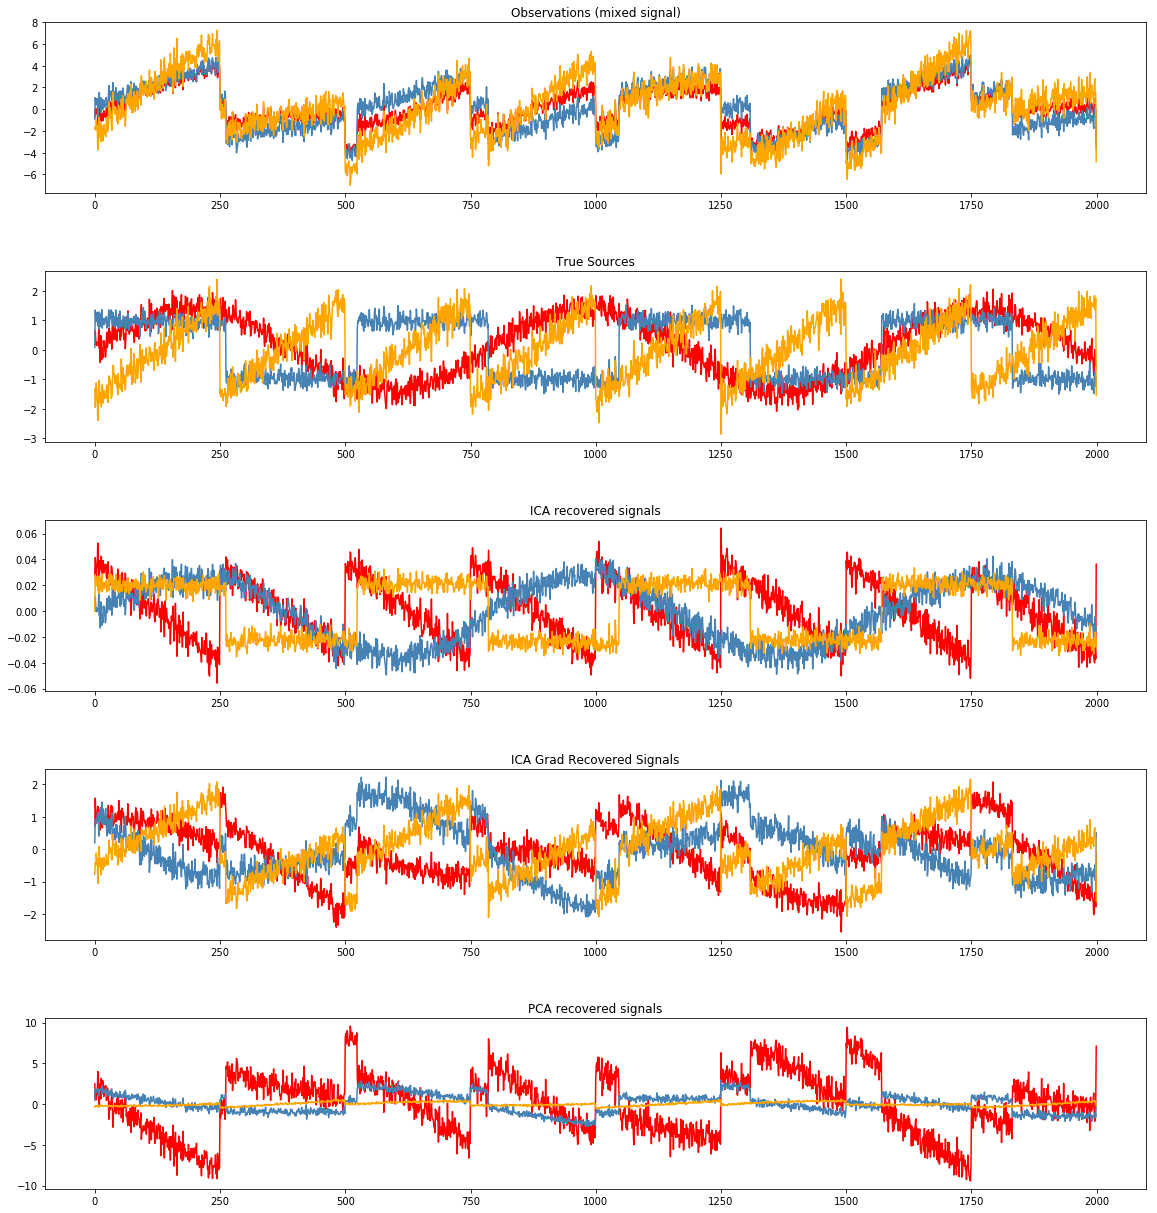

In [178]:
# Plot results
plt.figure(figsize=(18, 18))
models = [X, S, S_,S_grad, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'ICA Grad Recovered Signals',
         'PCA recovered signals'
        ]
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(5, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()